# 20기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [84]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

#### 1-1 데이터 탐색 및 결측치 제거

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


`Product_Category_2, Product_Category_3 두 feature에서 결측치 확인` <br>
많은 비율의 결측치를 가지고 있기 때문에 제거하고자 한다.

In [86]:
# 결측치 제거
df = df.drop(['Product_Category_2','Product_Category_3'], axis = 1)

In [87]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [88]:
df.shape

(4998, 10)

In [89]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,23913.000000


In [90]:
# unique value 개수파악

unique_cnt = {}

for i in df.columns :
    unique_cnt[i] = df[i].nunique()
    
unique_cnt

{'User_ID': 2656,
 'Product_ID': 1797,
 'Gender': 2,
 'Age': 7,
 'Occupation': 21,
 'City_Category': 3,
 'Stay_In_Current_City_Years': 5,
 'Marital_Status': 2,
 'Product_Category_1': 20,
 'Purchase': 3736}

#### 1-2 데이터 파악

`feature(unique 데이터 수)`

1. User_ID : 사용자 ID(2656)
2. Product_ID : 상품 ID(1797)
3. Gender : 성(2)
4. Age : 연령(7)
5. Occupation : 직업(21)
6. City_Category : 도시 종류(3)
7. Stay_In_Current_City_Years : 현재 도시에 머문 년수(5)
8. Marital_Status : 결혼 여부(2)
9. Product_Category_1 : 상품 범주 1(20)

10. Purchase - 구매량(3736) -> `target 변수`


#### 1-3 데이터 시각화

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='Gender', ylabel='count'>

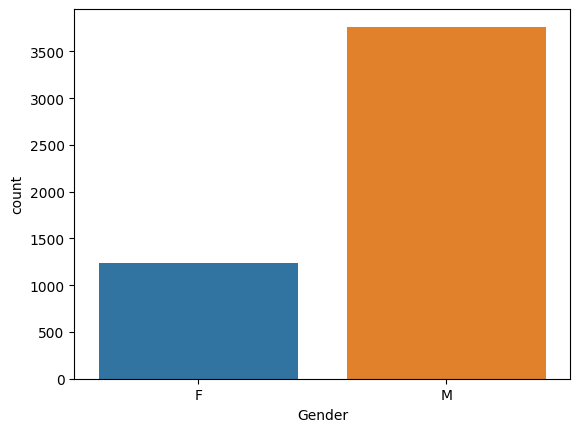

In [92]:
# Gender

sns.countplot(x = "Gender", data = df)

`구매자의 대부분은 남성임을 확인할 수 있다.`

<Axes: xlabel='Marital_Status', ylabel='count'>

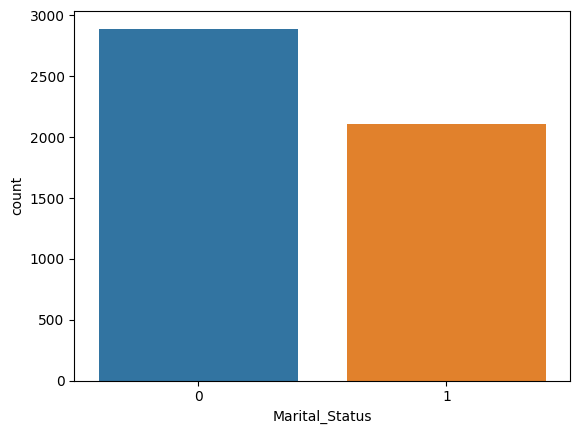

In [93]:
sns.countplot(x = "Marital_Status", data = df)

`미혼의 사람들이 기혼의 사람들 보다 더 많이 구매한 것을 확인할 수 있다.`

<Axes: xlabel='Age', ylabel='count'>

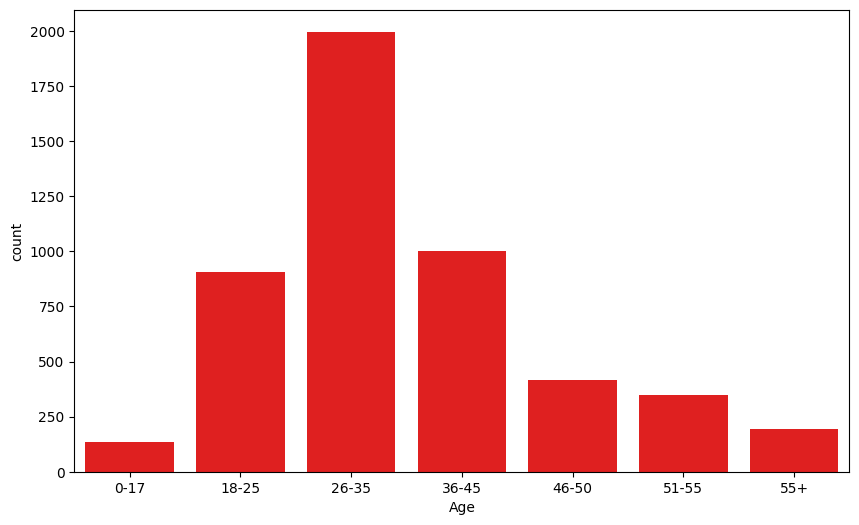

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "Age", data = df, color = "r")

`구매자 중 청년의 비율이 압도적으로 많은 것을 확인할 수 있다.`

<Axes: xlabel='Occupation', ylabel='count'>

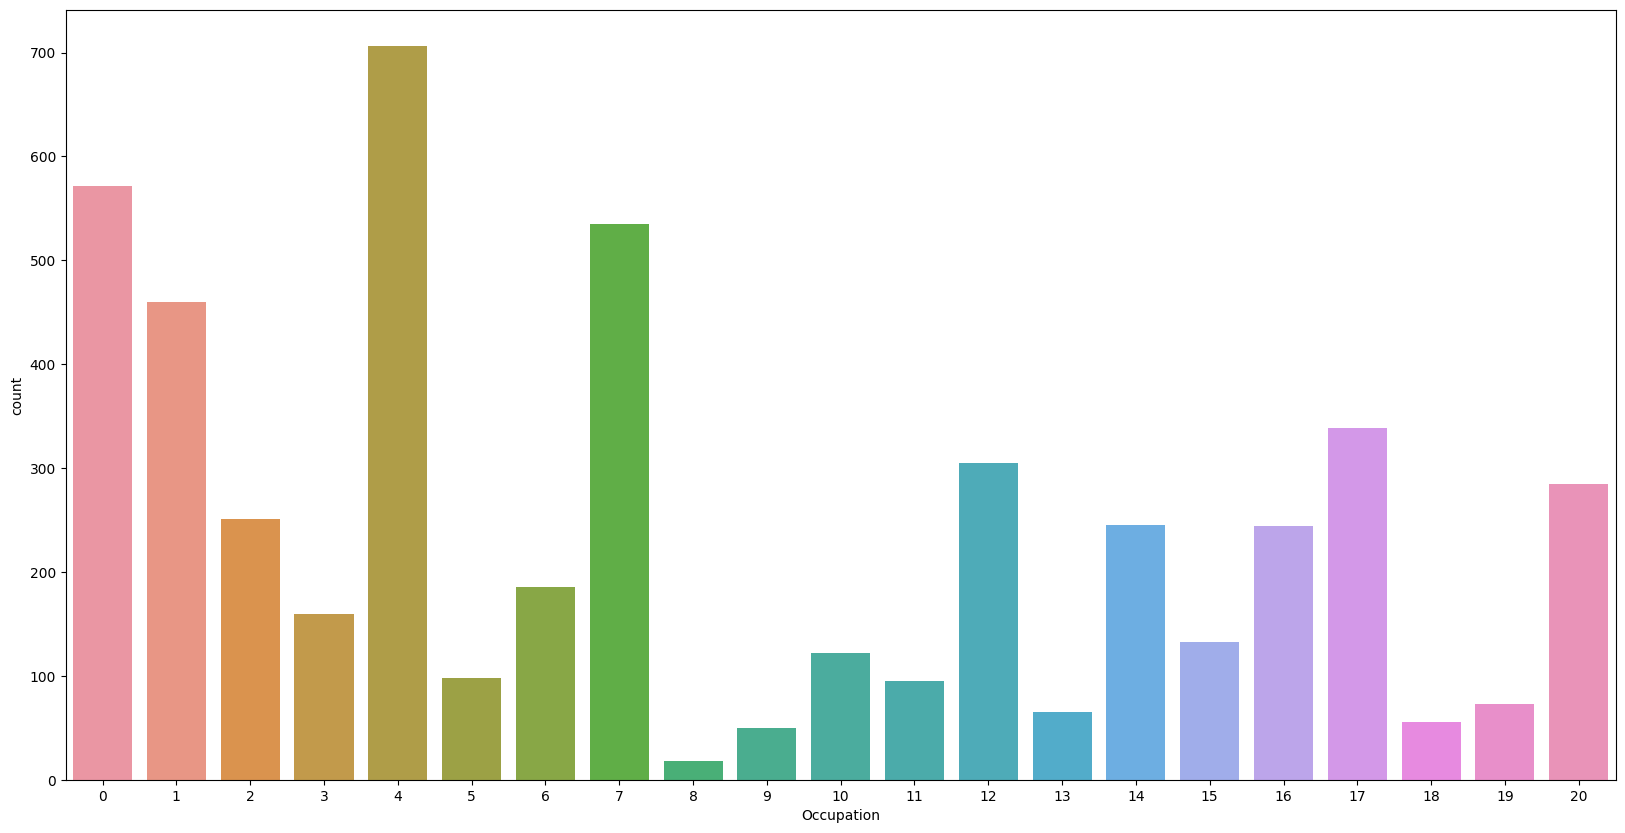

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Occupation", data = df)

<Axes: xlabel='City_Category', ylabel='count'>

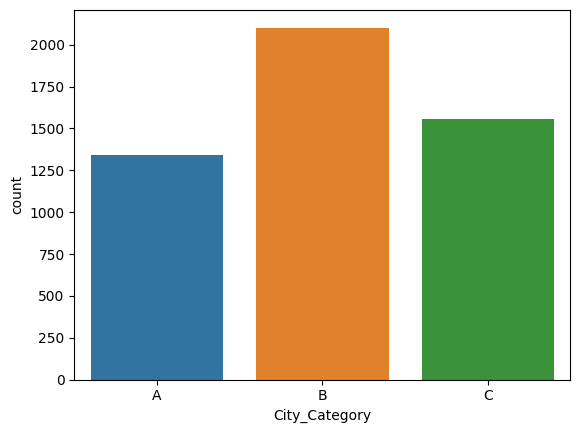

In [96]:
sns.countplot(x = "City_Category", data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

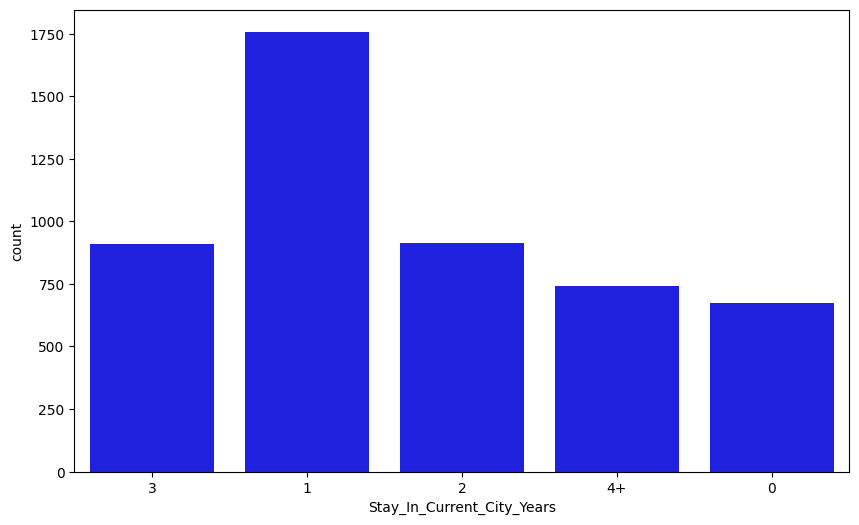

In [97]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Stay_In_Current_City_Years", data = df, color = "b")

<Axes: xlabel='Product_Category_1', ylabel='count'>

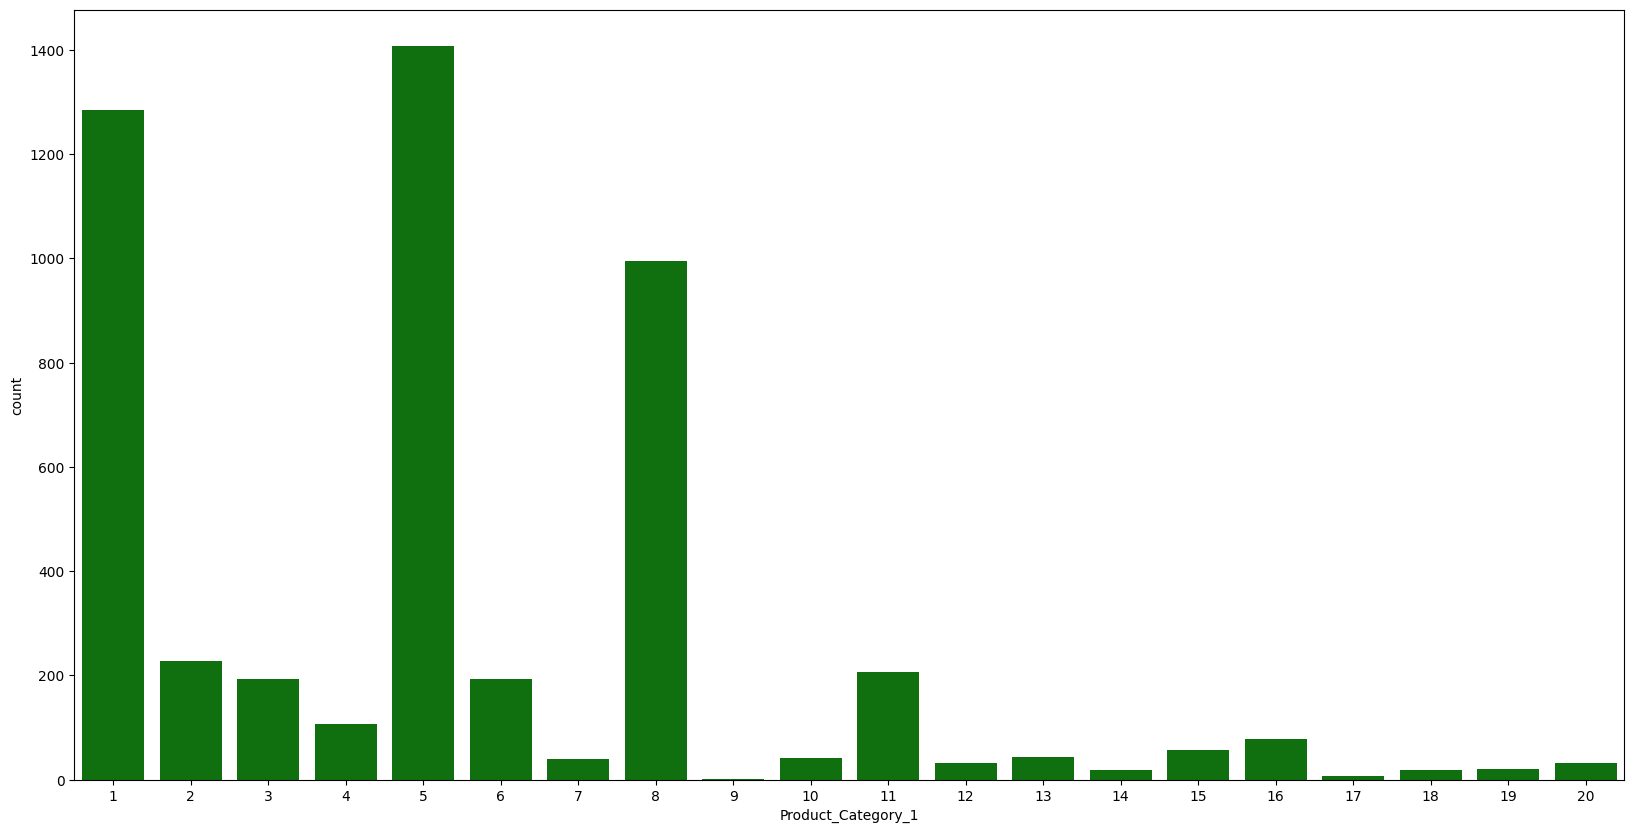

In [98]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Product_Category_1", data = df, color = "g")

시각화를 진행하면서 User_ID는 사용자들의 고유 번호이기 때문에, 분석 과정에서 영향력이 없음으로 판단되어서 이 또한 삭제하고자 한다.

In [99]:
df = df.drop(["User_ID"], axis=1)

In [100]:
df.shape

(4998, 9)

<Axes: xlabel='Product_ID', ylabel='count'>

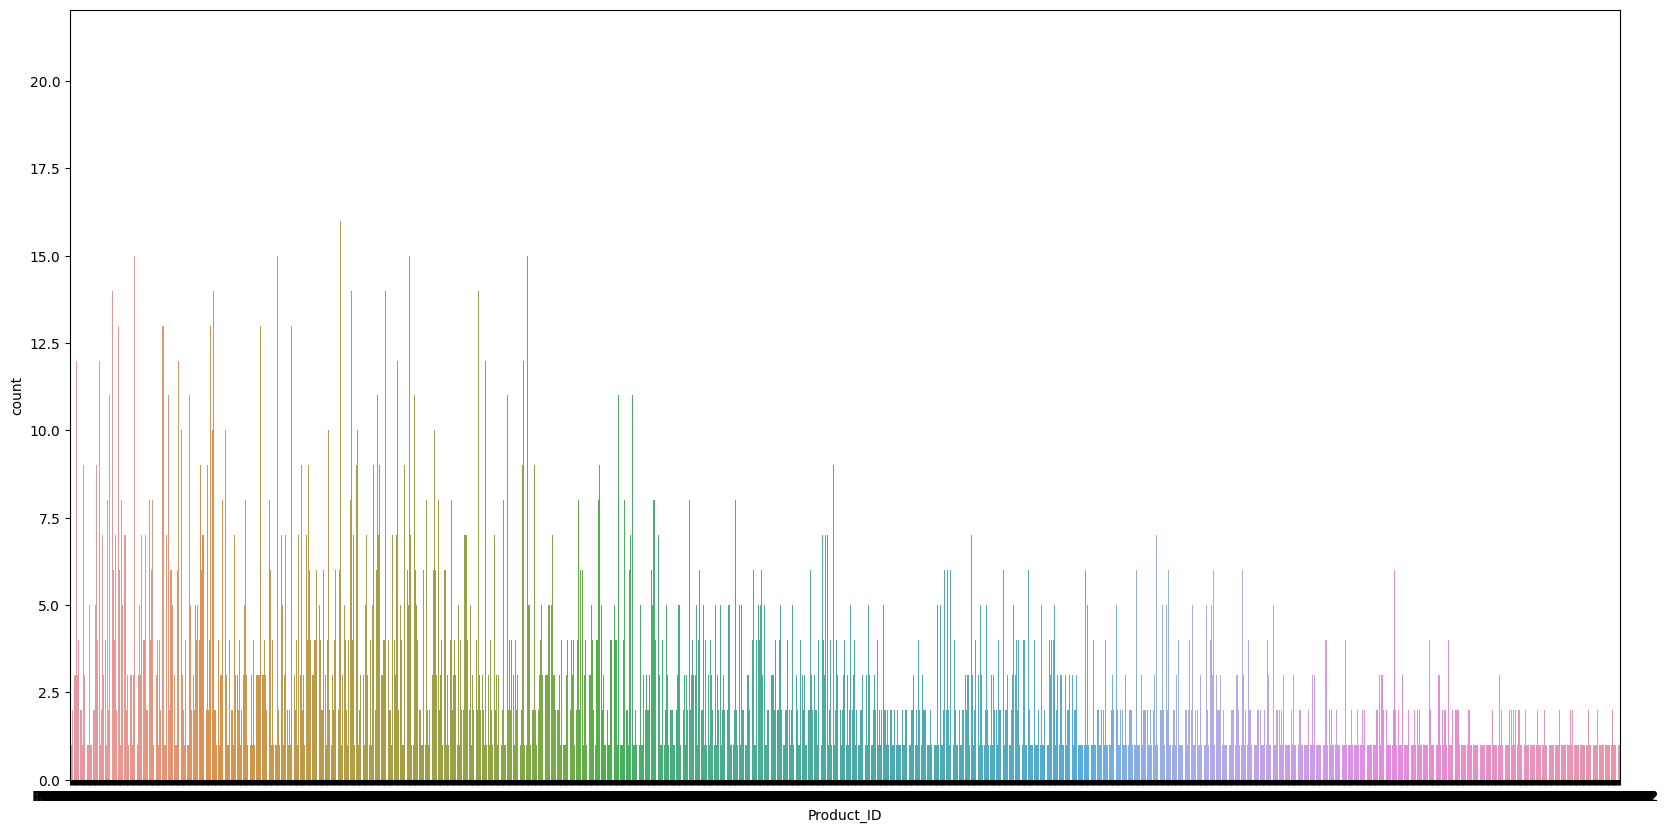

In [101]:
plt.figure(figsize=(20,10))
sns.countplot(x ="Product_ID", data =df)

`정말 많은 고유값을 가지고 있음을 확인할 수 있다.`

<Axes: xlabel='Age', ylabel='count'>

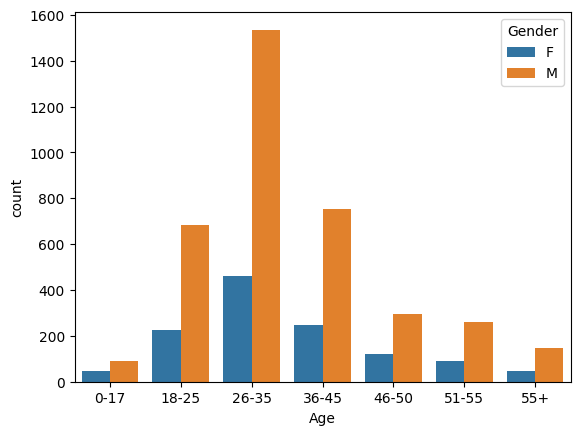

In [102]:
# age, gender

sns.countplot(x= "Age",  hue = "Gender", data = df)


<Axes: xlabel='Gender', ylabel='Purchase'>

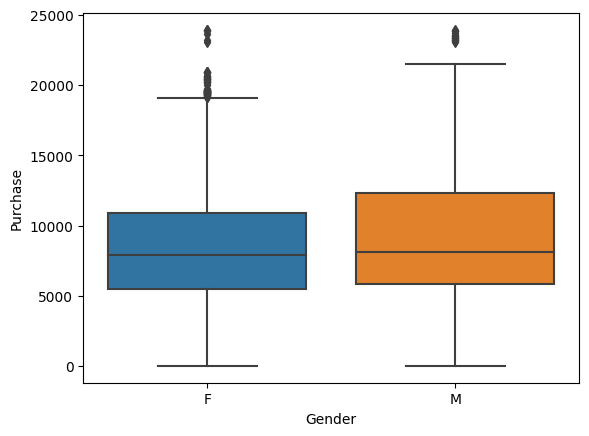

In [103]:
# Gender, Purchase
sns.boxplot(x = df['Gender'], y = df['Purchase'])

#### 1-4 원 핫 인코딩 진행 (One-Hot-Encoding)

In [104]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Marital_Status', 'Stay_In_Current_City_Years', 'Product_Category_1']

ohe = OneHotEncoder()
ohe_fit = ohe.fit(df[cat_columns])

ohe_encoded = ohe_fit.transform(df[cat_columns]).toarray()

ohe_df = pd.DataFrame(ohe_encoded, columns = ohe_fit.get_feature_names_out(cat_columns))
final_df = pd.concat([ohe_df, df['Purchase']], axis = 1)
final_df

,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,Product_ID_P00000642,Product_ID_P00000742,Product_ID_P00001042,Product_ID_P00001142,Product_ID_P00001242,Product_ID_P00001342,...,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Purchase
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7696
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16429
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11701
4994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2045
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4505
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1413


## 2. KNN 구현 & 파라미터 튜닝

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [106]:
# 데이터 분리(train_test_split)

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1], final_df['Purchase'], test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3998, 1857), (3998,), (1000, 1857), (1000,))

In [110]:
# Knn 구현(기본값으로 k = 5 설정)

knn_model = KNeighborsRegressor(n_neighbors = 5) 
knn_model.fit(X_train, y_train)

print(f"train score : {knn_model.score(X_train, y_train)}")
print(f"test score : {knn_model.score(X_test, y_test)}")

train score : 0.5323725719454702
test score : 0.3174972511629729


* 하이퍼 파라미터 튜닝(1) - K 값

In [111]:
list_k = []

for i in range(1,31) : # k값의 범위 1~30으로 제한 ++ 홀수 값만 선택
    if i%2 != 0 :
        list_k.append(i)
        
train_acc = []
test_acc = []

for k in list_k :
    reg = KNeighborsRegressor(n_neighbors = k)
    reg.fit(X_train, y_train)
    train_acc.append(reg.score(X_train,y_train))
    test_acc.append(reg.score(X_test,y_test))

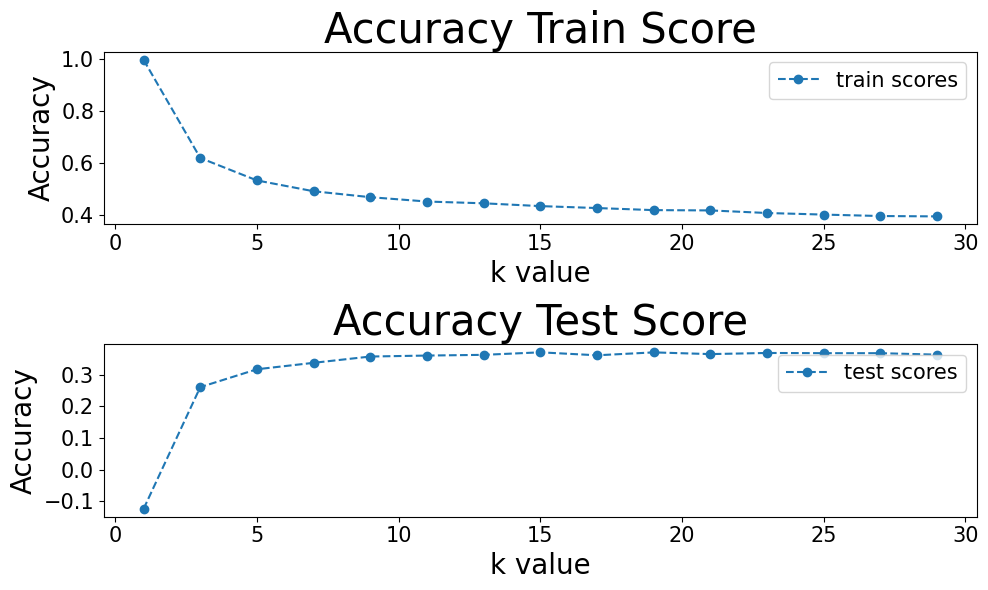

In [116]:
plt.figure(figsize = (10,6))

plt.subplot(2,1,1) # k값에 따른 train set의 정확도 그래프
plt.plot(list_k, train_acc, marker = "o", linestyle = "dashed")
plt.legend(['train scores'], fontsize = 15)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Accuracy Train Score', fontsize=30)

plt.subplot(2,1,2) # k값에 따른 test set의 정확도 그래프
plt.plot(list_k, test_acc, marker='o', linestyle='dashed')
plt.legend(['test scores'], fontsize=15)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Accuracy Test Score', fontsize=30)

plt.tight_layout()
plt.show()

K값의 변화에 따른 train data와 test 데이터의 accuracy 값과 그래프를 나타냈다. <br>

분석해봤을 때, train data는 k값이 커질 수록 accuracy는 감소하고, test data는 train과 상반된 결과를 확인할 수 있다.

또한 처음에 범위를 1~30까지 진행을 했지만, 일반적으로 1~20으로 제한하는 경우가 대부분이기 때문에, 다음 튜닝부터 1~20으로 두고 계산을 하고자 한다.

* 하이퍼 파라미터 튜닝(2) - GridSearchCV

1. K(n_neighbors) : 이웃 데이터 개수
2. weight : 가중치 함수
3. Distance Measure : 거리 척도 (p)

In [127]:
k = list(range(1,20, 2)) # 1~19까지 홀수

grid_parameters = {'n_neighbors' : k,
                   'weights' : ['uniform', 'distance'],
                   'p': [1, 2, 3]} 
# p=1 : 맨하튼 거리, p=2 : 유클리디안 거리, p=3 : 마할라노비스 거리
                                   

gs = GridSearchCV(knn_model, param_grid = grid_parameters, cv=10, verbose = 1)

result = gs.fit(X_train, y_train)
print(f"best score : {result.best_score_}")
print(f"best test score : {gs.score(X_test,y_test)}")
print(f"best parameter : {result.best_params_}")
print(gs.best_estimator_) 
pd.DataFrame(result.cv_results_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
best score : 0.36022487758458344
best test score : 0.3847625290565695
best parameter : {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
KNeighborsRegressor(n_neighbors=19, p=1, weights='distance')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057269,0.008569,0.420858,0.026648,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",-0.259211,0.021896,...,-0.129314,-0.125610,-0.209228,-0.331042,-0.142395,-0.193722,-0.005320,-0.144834,0.103506,55
1,0.060325,0.007089,0.424811,0.021304,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",-0.259211,0.021896,...,-0.129314,-0.125610,-0.209228,-0.331042,-0.142395,-0.193722,-0.005320,-0.144834,0.103506,55
2,0.063557,0.011563,0.102691,0.008131,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",-0.259211,0.021896,...,-0.129314,-0.125610,-0.209228,-0.331042,-0.142395,-0.193722,-0.005320,-0.144834,0.103506,55
3,0.061458,0.005247,0.101501,0.007331,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",-0.259211,0.021896,...,-0.129314,-0.125610,-0.209228,-0.331042,-0.142395,-0.193722,-0.005320,-0.144834,0.103506,55
4,0.059112,0.005056,2.083627,0.059679,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",-0.259211,0.021896,...,-0.129314,-0.125610,-0.209228,-0.331042,-0.142395,-0.193722,-0.005320,-0.144834,0.103506,55
5,0.061479,0.005075,2.095528,0.042133,1,3,distance,"{'n_neighbors': 1, 'p': 3, 'weights': 'distance'}",-0.259211,0.021896,...,-0.129314,-0.125610,-0.209228,-0.331042,-0.142395,-0.193722,-0.005320,-0.144834,0.103506,55
6,0.059405,0.004868,0.439541,0.020526,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.104649,0.306832,...,0.250534,0.190145,0.186682,0.146800,0.182642,0.155871,0.313640,0.216173,0.073533,52
7,0.060182,0.006664,0.437700,0.017709,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.110825,0.318265,...,0.264529,0.203657,0.198830,0.173102,0.205049,0.181049,0.331448,0.232150,0.072336,49
8,0.066507,0.007092,0.103839,0.003329,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.104649,0.306832,...,0.250534,0.190145,0.186682,0.146800,0.182642,0.155871,0.313640,0.216173,0.073533,52
9,0.063498,0.007257,0.100397,0.004077,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.107399,0.314561,...,0.260436,0.198889,0.195848,0.162661,0.195913,0.172302,0.323759,0.226198,0.072771,50


결과적으로 최적의 파라미터는 <br>
* `k 값 : 19개`
* `가중치 : distance`
* `거리 척도(p) : 맨하튼 거리` <br>
일 때, <br> 
`best score : 0.360224...` <br>
`best test score : 0.384762...` <br>
의 결과가 나왔다. 

## 3. Evaluation

- 위와 같은 하이퍼파라미터 튜닝을 진행했을 때, 전반적으로 정확도가 낮은 결과가 나왔음을 확인할 수 있다.

- 범주형 설명 변수들을 원 핫 인코딩하는 과정에서 각 범주에 대해 새로운 이진 변수가 생성되기 때문에, 데이터의 차원이 증가하게 되어서 정확도도 낮아지게 되고, 연산 시간이 증가되었던 것 같다.

- 따라서 knn 알고리즘 이외에 다른 모델을 이용하는 것이 바람직할 것 같다는 생각이 든다.